# Time Series Forecasting for Sales Predictions
---


Pipeline steps -
1. **Data Wrangling and Exploratory Data Analysis**
2. **Feature Engineering and Selection**
3. Modeling and forecasting
4. Model evaluation and validation
5. Sales quantity forecast results
6. Observation and analysis report

## 1. Read data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Online Retail.csv", encoding= 'unicode_escape')
df.head()            

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## 2. Data exploration

In [3]:
# size of the df
df.shape

(541909, 8)

In [4]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# number of unique values for each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
# top 10 countries by value counts
df['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

## 3. Data Cleaning

#### Missing/NaN values

In [8]:
# Checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Dropping `CustomerID` column 

In [9]:
df['CustomerID'].nunique()

4372

In [10]:
df = df.dropna(subset=['CustomerID'])

In [11]:
df['CustomerID'].nunique()

4372

In [12]:
# Checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Out of stock items

In [13]:
# Analyze quantities that are out of stock
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


Looks like out of stock  items are labeled with 'C' in the invoice table.

Lets drop these rows as they don’t contribute to the future sales
but first lets confirm this.

In [14]:
df[df['InvoiceNo'].str.contains('C', na = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [15]:
# Drop items that are out of stock
df = df[~df['InvoiceNo'].str.contains('C', na = False)]

In [16]:
df.shape

(397924, 8)

#### Unit Price 

In [22]:
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Looks like there are some unit prices that are $0.

Lets take a look at the items with large quantity but 0 unit price


In [23]:
df.loc[df.UnitPrice == 0].sort_values(by="Quantity", ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/11 15:57,0.0,13256.0,United Kingdom
298054,562973,23157,SET OF 6 NATIVITY MAGNETS,240,8/11/11 11:42,0.0,14911.0,EIRE
436428,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,11/3/11 11:26,0.0,12415.0,Australia
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,8/26/11 14:19,0.0,14646.0,Netherlands
314747,564651,22955,36 FOIL STAR CAKE CASES,144,8/26/11 14:19,0.0,14646.0,Netherlands


In [25]:
# Drop all the items that have 0 unit price
df = df.loc[df.UnitPrice > 0]

In [27]:
df.Quantity.describe()

count    397884.000000
mean         12.988238
std         179.331775
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

## 4. Data Visualization

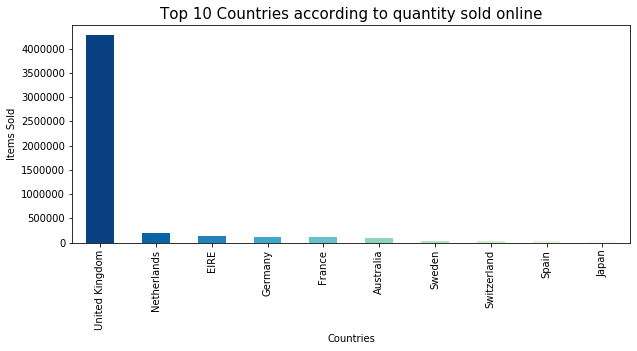

In [17]:
color = plt.cm.GnBu(np.linspace(1, 0, 10))
countries_10 = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(10)
countries_10.plot.bar(figsize = (10, 4),color = color)

plt.title('Top 10 Countries according to quantity sold online', fontsize = 15)
plt.xlabel('Countries')
plt.ylabel('Items Sold')
plt.show()

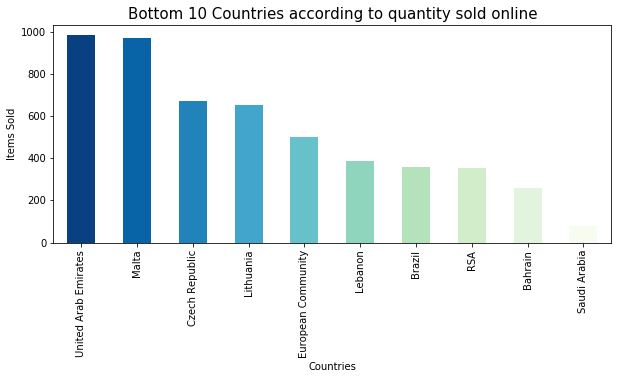

In [18]:
color = plt.cm.GnBu(np.linspace(1, 0, 10))
countries_10 = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False).tail(10)
countries_10.plot.bar(figsize = (10, 4),color = color)

plt.title('Bottom 10 Countries according to quantity sold online', fontsize = 15)
plt.xlabel('Countries')
plt.ylabel('Items Sold')
plt.show()

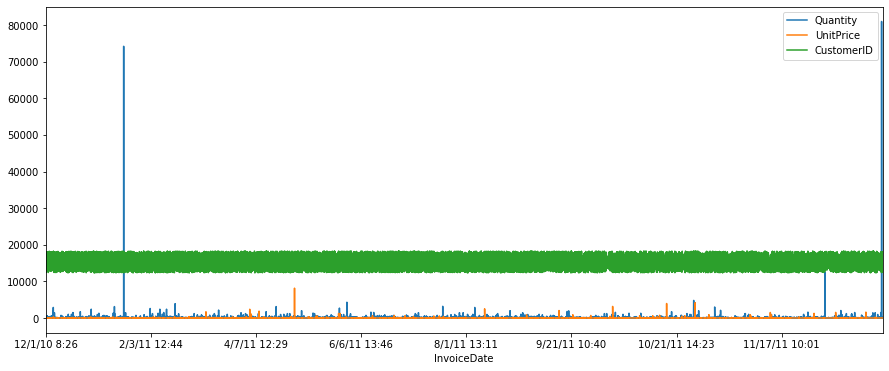